### Imports

In [1]:
from MultiLayerPerceptron import train, Dense, predict_with_layer_value,mse, mse_derivative
from activation_functions import Sigmoid
from utils import *
from plots import *
from font import fontDict
import numpy as np
import time

### Config params

In [2]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation = get_config_params('./config_denoising.json')

In [3]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
dataset = np.reshape(bitmapList,(len(bitmapList), 35, 1))

### 35-20-10-2-10-20-35

In [4]:

autoencoder = [
    Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
]

## Salt & Pepper Training

In [5]:
# Normal training
error = train(autoencoder, mse, mse_derivative, dataset, dataset, epochs=max_epochs, verbose=False)
noise_level=0.1
noisy_dataset_test_salt = add_salt_and_pepper_noise_to_dataset(dataset, noise_level)


### Without Noisy Data Set

Correct Predictions:  9
Accuracy:  0.28125


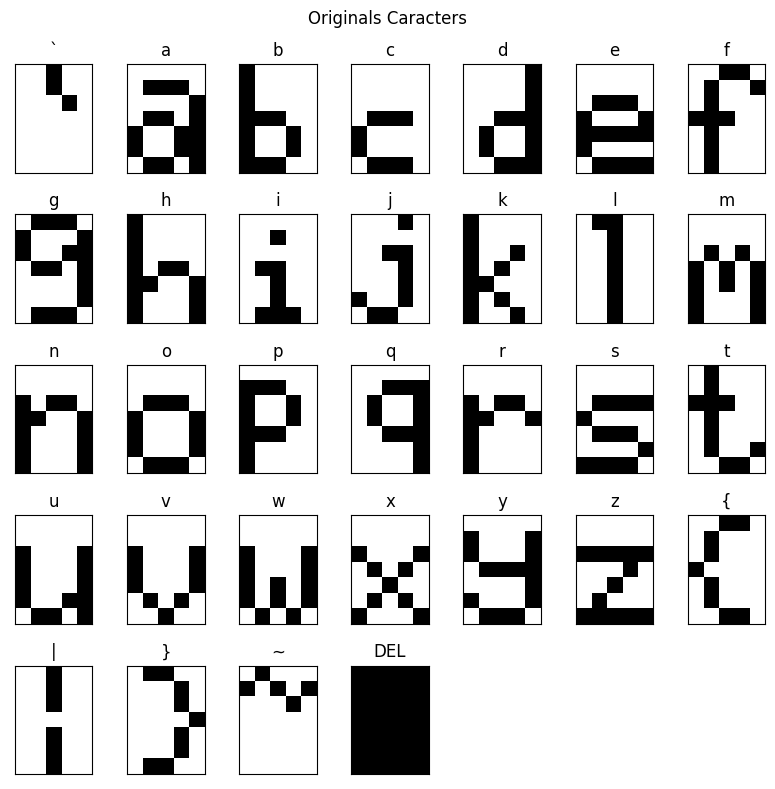

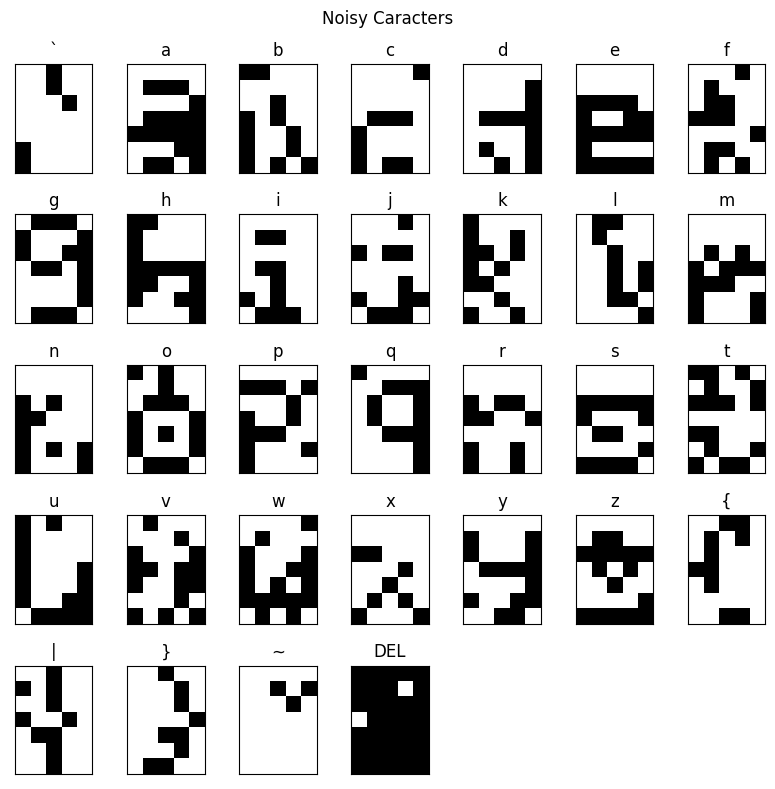

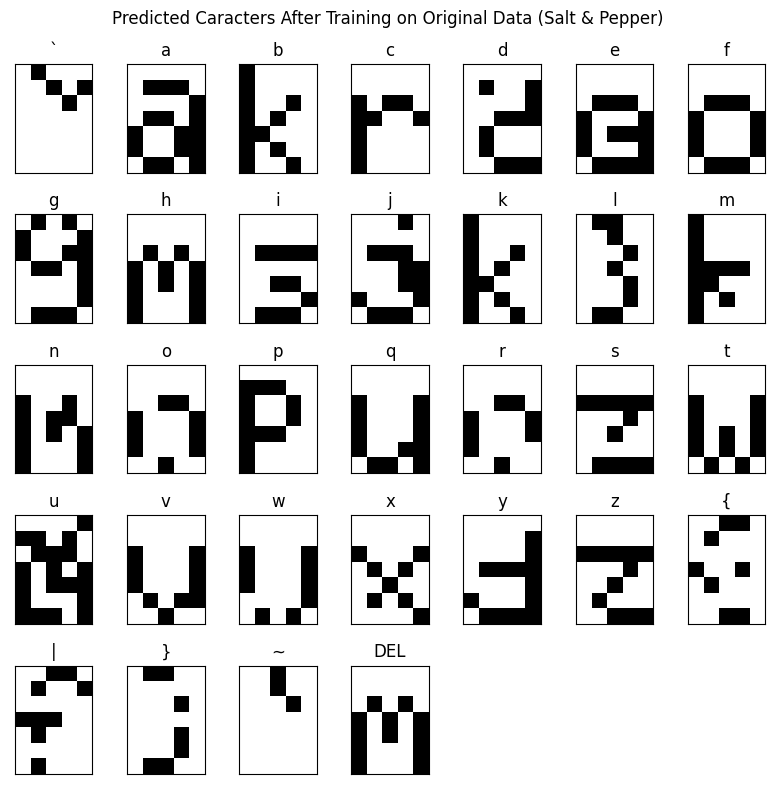

In [6]:
characters = list(bitmapDict.keys())

input_matrix_list = []
output_matrix_list = []
noisy_matrix_list = []

correct_predictions = 0

noise_level = 0.1

for c in range(len(characters)):
    input_bitmap = []
    noisy_bitmap = []
    output_bitmap = []

    for i in range(len(dataset[c])):
        input_bitmap.append(dataset[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)
    input_matrix_list.append(input_bitmap_matrix)

    for i in range(len(noisy_dataset_test_salt[c])):
        noisy_bitmap.append(noisy_dataset_test_salt[c][i][0])
    noisy_bitmap_matrix = bitmap_as_matrix(noisy_bitmap) 
    noisy_matrix_list.append(noisy_bitmap_matrix)   

    outputs, raw_latent_space = predict_with_layer_value(autoencoder, noisy_dataset_test_salt[c], 6)


    for output in outputs:
        output_bitmap.append(round(abs(output[0])))
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)
    output_matrix_list.append(output_bitmap_matrix)


    if compare_matrixes(input_bitmap_matrix, output_bitmap_matrix) > 32: 
        correct_predictions += 1

    # plot_bitmap_matrix_with_noise(input_bitmap_matrix, noisy_bitmap_matrix, output_bitmap_matrix, characters[c])

print("Correct Predictions: ", correct_predictions)
print("Accuracy: ", correct_predictions / len(characters))

plot_bitmap_matrix_2(input_matrix_list, characters, "Originals Caracters")
plot_bitmap_matrix_2(noisy_matrix_list, characters, "Noisy Caracters")
plot_bitmap_matrix_2(output_matrix_list, characters, "Predicted Caracters After Training on Original Data (Salt & Pepper)")

### Training with noisy DataSet

In [7]:
# Training with noise
noise_level = 0.1
for i in range(10):
    noisy_dataset = add_salt_and_pepper_noise_to_dataset(dataset, noise_level)
    error = train(autoencoder, mse, mse_derivative, noisy_dataset, dataset, epochs=max_epochs, verbose=False)

Correct Predictions:  5
Accuracy:  0.15625


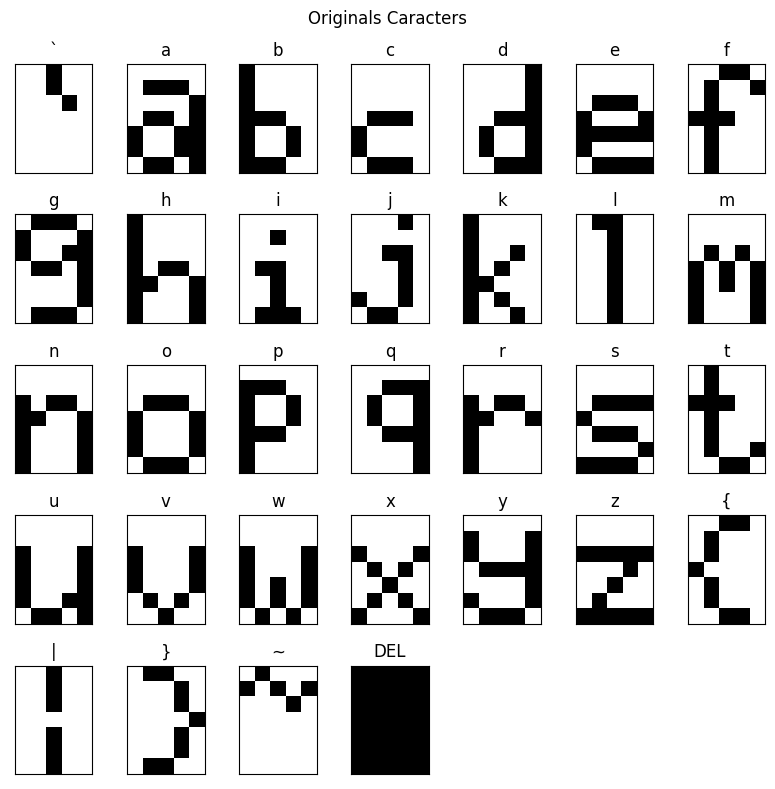

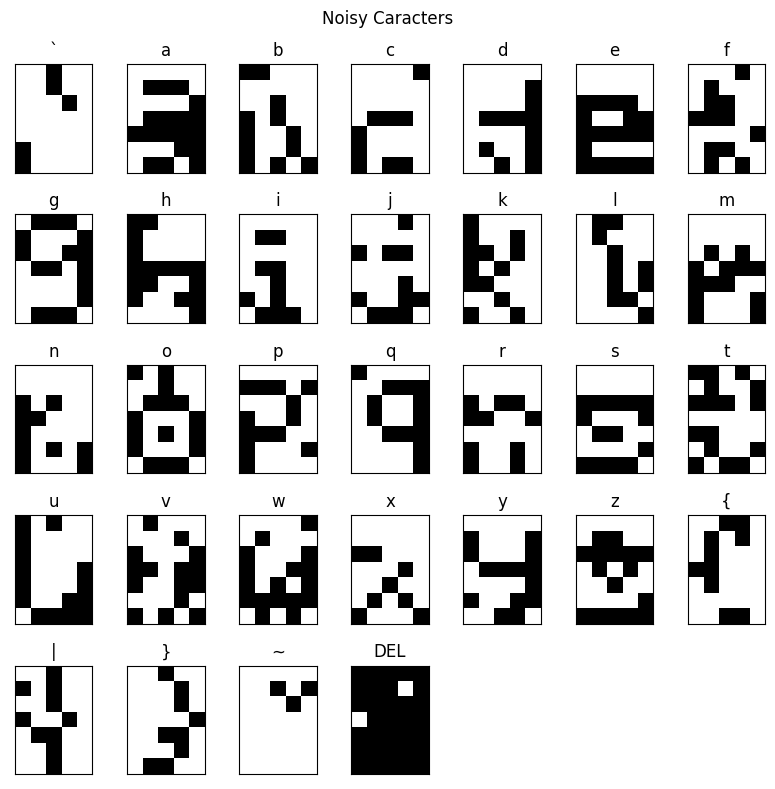

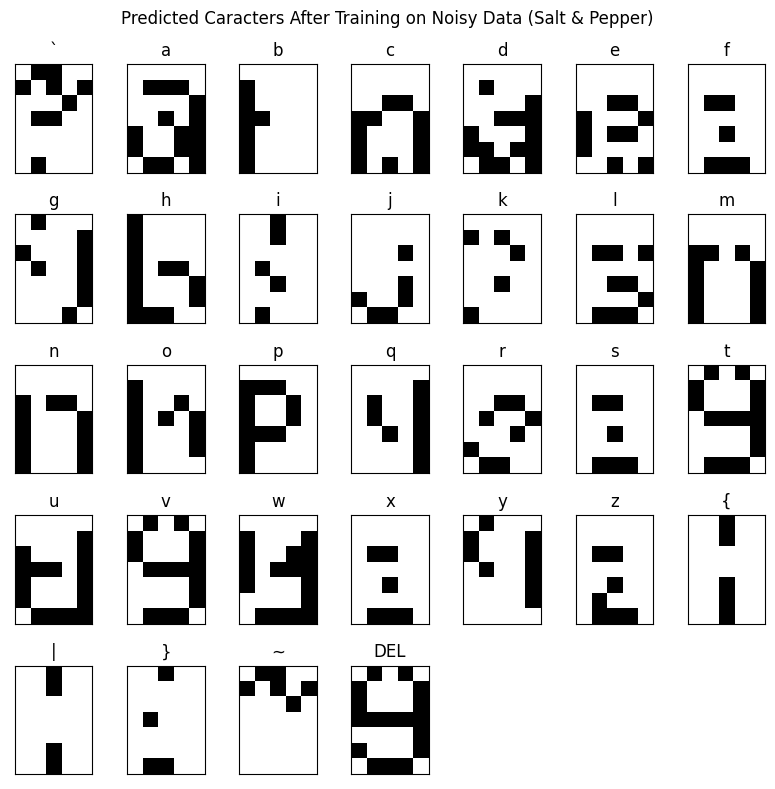

In [8]:
characters = list(bitmapDict.keys())

input_matrix_list = []
output_matrix_list = []
noisy_matrix_list = []

correct_predictions = 0

noise_level = 0.1

for c in range(len(characters)):
    input_bitmap = []
    noisy_bitmap = []
    output_bitmap = []


    for i in range(len(dataset[c])):
        input_bitmap.append(dataset[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)
    input_matrix_list.append(input_bitmap_matrix)

    for i in range(len(noisy_dataset_test_salt[c])):
        noisy_bitmap.append(noisy_dataset_test_salt[c][i][0])
    noisy_bitmap_matrix = bitmap_as_matrix(noisy_bitmap) 
    noisy_matrix_list.append(noisy_bitmap_matrix)   


    outputs, raw_latent_space = predict_with_layer_value(autoencoder, noisy_dataset_test_salt[c], 6)


    for output in outputs:
        output_bitmap.append(round(abs(output[0])))
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)
    output_matrix_list.append(output_bitmap_matrix)


    if compare_matrixes(input_bitmap_matrix, output_bitmap_matrix) > 32:
        correct_predictions += 1

    # plot_bitmap_matrix_with_noise(input_bitmap_matrix, noisy_bitmap_matrix, output_bitmap_matrix, characters[c])

print("Correct Predictions: ", correct_predictions)
print("Accuracy: ", correct_predictions / len(characters))

plot_bitmap_matrix_2(input_matrix_list, characters, "Originals Caracters")
plot_bitmap_matrix_2(noisy_matrix_list, characters, "Noisy Caracters")
plot_bitmap_matrix_2(output_matrix_list, characters, "Predicted Caracters After Training on Noisy Data (Salt & Pepper)")

## Delta Noise

### Without Training on Noisy

In [9]:
autoencoder2 = [
    Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
]

# Normal training
error = train(autoencoder2, mse, mse_derivative, dataset, dataset, epochs=max_epochs, verbose=False)



In [10]:
noise_level = 0.5
noisy_dataset_test_delta = add_noise_to_dataset(dataset, noise_level)

Correct Predictions:  7
Accuracy:  0.21875


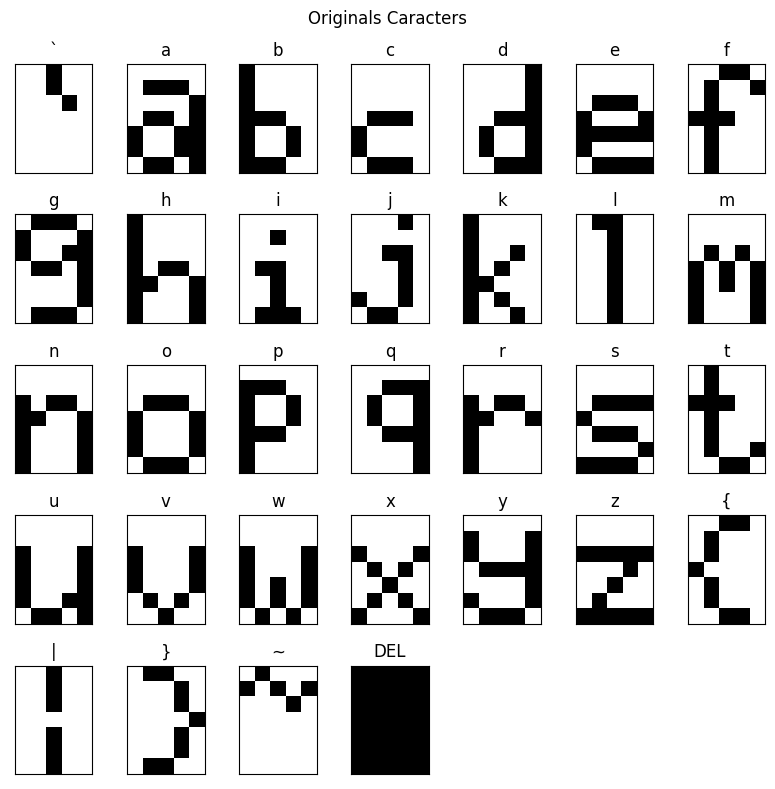

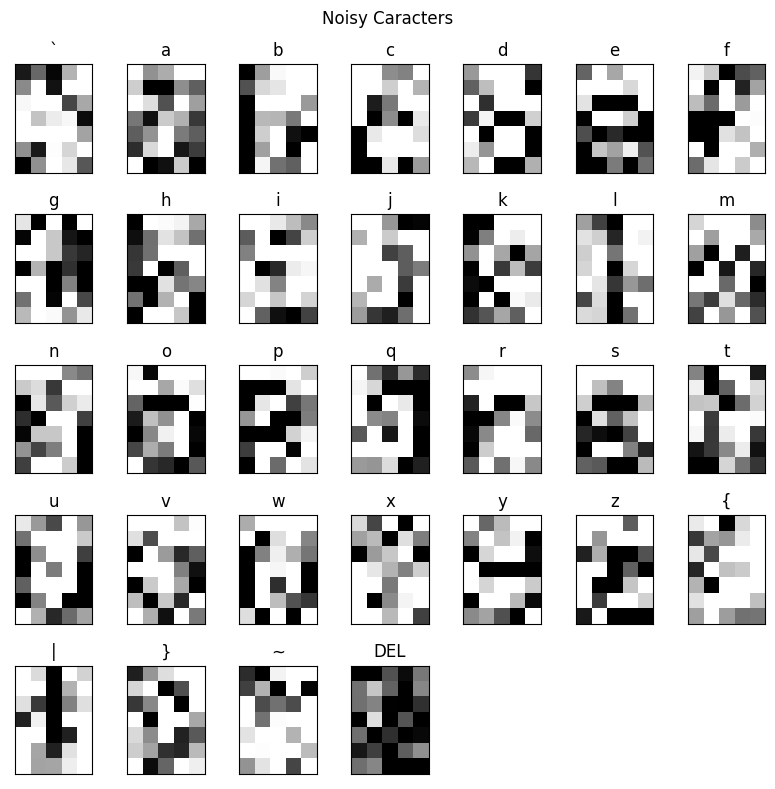

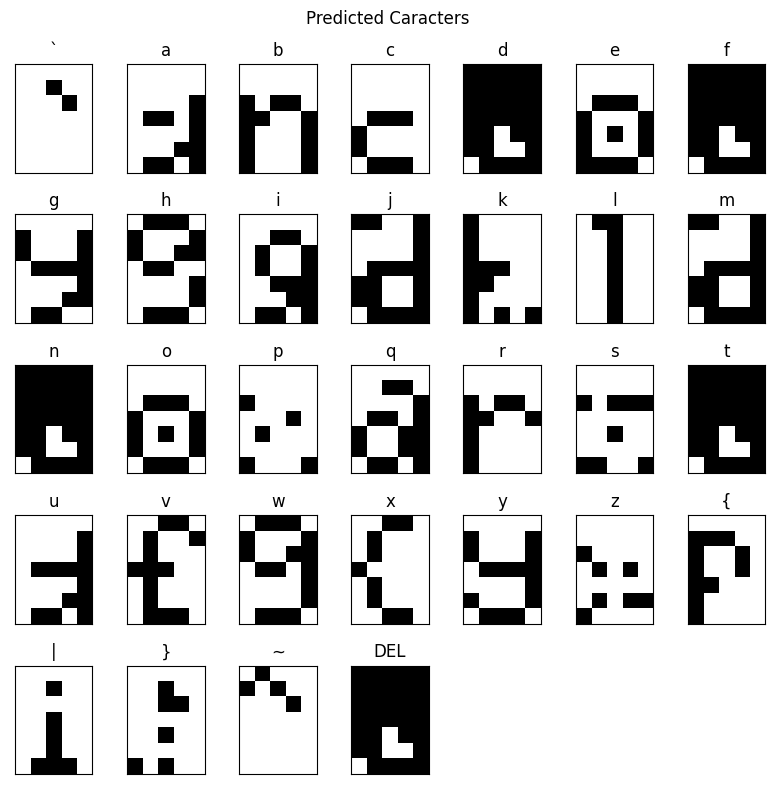

In [11]:
characters = list(bitmapDict.keys())

input_matrix_list = []
output_matrix_list = []
noisy_matrix_list = []

correct_predictions = 0

for c in range(len(characters)):
    input_bitmap = []
    noisy_bitmap = []
    output_bitmap = []

    # dataset es una lista de listas de -listas con un solo elemento-
    for i in range(len(dataset[c])):
        input_bitmap.append(dataset[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)
    input_matrix_list.append(input_bitmap_matrix)

    for i in range(len(noisy_dataset[c])):
        noisy_bitmap.append(noisy_dataset_test_delta[c][i][0])
    noisy_bitmap_matrix = bitmap_as_matrix(noisy_bitmap) 
    noisy_matrix_list.append(noisy_bitmap_matrix)   


    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder2, noisy_dataset_test_delta[c], 6)


    for output in outputs:
        output_bitmap.append(round(abs(output[0])))
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)
    output_matrix_list.append(output_bitmap_matrix)


    if compare_matrixes(input_bitmap_matrix, output_bitmap_matrix) > 32: # 32 pixeles iguales de 35
        correct_predictions += 1

    # plot_bitmap_matrix(noisy_bitmap_matrix, output_bitmap_matrix, characters[c])

print("Correct Predictions: ", correct_predictions)
print("Accuracy: ", correct_predictions / len(characters))

plot_bitmap_matrix_2(input_matrix_list, characters, "Originals Caracters")
plot_bitmap_matrix_2(noisy_matrix_list, characters, "Noisy Caracters")
plot_bitmap_matrix_2(output_matrix_list, characters, "Predicted Caracters")

### Training on Noisy Data

In [12]:
# Training with noise
noise_level = 0.5
for i in range(10):
    print("Iteration: ", i)
    noisy_dataset = add_noise_to_dataset(dataset, noise_level)
    error = train(autoencoder2, mse, mse_derivative, noisy_dataset, dataset, epochs=max_epochs, verbose=False)

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9


After Training on Noisy Data (Delta) : 
Correct Predictions:  0
Accuracy:  0.0


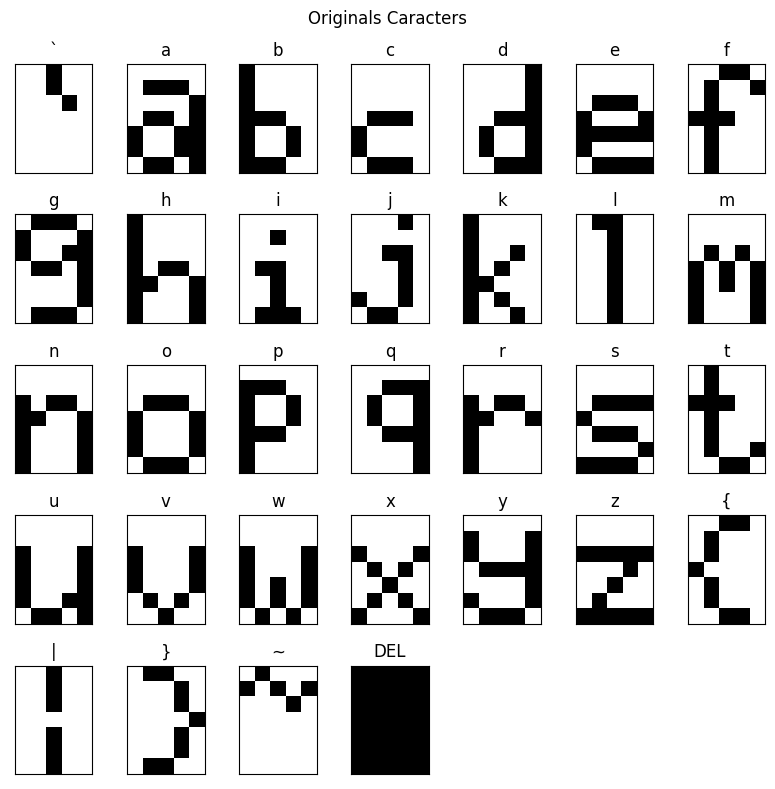

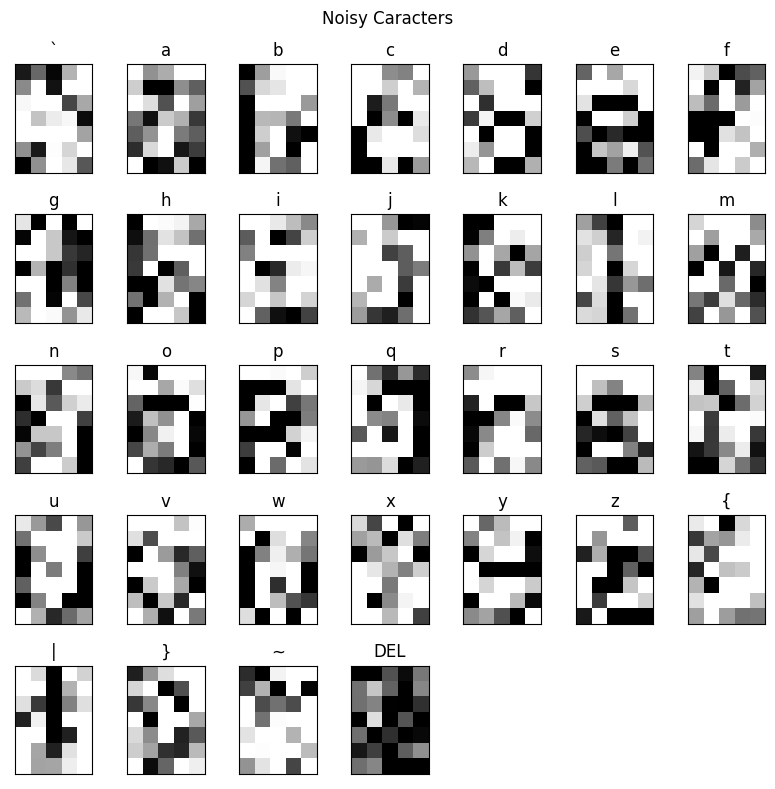

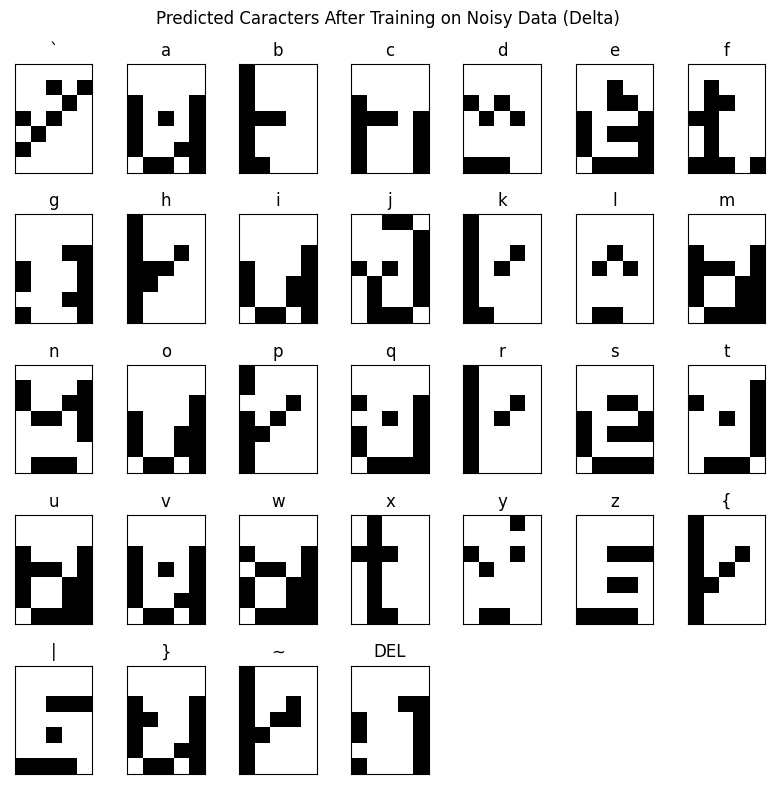

In [13]:
characters = list(bitmapDict.keys())

input_matrix_list = []
output_matrix_list = []
noisy_matrix_list = []

correct_predictions = 0

for c in range(len(characters)):
    input_bitmap = []
    noisy_bitmap = []
    output_bitmap = []

    # dataset es una lista de listas de -listas con un solo elemento-
    for i in range(len(dataset[c])):
        input_bitmap.append(dataset[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)
    input_matrix_list.append(input_bitmap_matrix)

    for i in range(len(noisy_dataset[c])):
        noisy_bitmap.append(noisy_dataset_test_delta[c][i][0])
    noisy_bitmap_matrix = bitmap_as_matrix(noisy_bitmap) 
    noisy_matrix_list.append(noisy_bitmap_matrix)   


    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder2, noisy_dataset_test_delta[c], 6)


    for output in outputs:
        output_bitmap.append(round(abs(output[0])))
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)
    output_matrix_list.append(output_bitmap_matrix)


    if compare_matrixes(input_bitmap_matrix, output_bitmap_matrix) > 32: # 32 pixeles iguales de 35
        correct_predictions += 1

    # plot_bitmap_matrix(noisy_bitmap_matrix, output_bitmap_matrix, characters[c])
print("After Training on Noisy Data (Delta) : ")
print("Correct Predictions: ", correct_predictions)
print("Accuracy: ", correct_predictions / len(characters))

plot_bitmap_matrix_2(input_matrix_list, characters, "Originals Caracters")
plot_bitmap_matrix_2(noisy_matrix_list, characters, "Noisy Caracters")
plot_bitmap_matrix_2(output_matrix_list, characters, "Predicted Caracters After Training on Noisy Data (Delta)")